In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
#import mplcyberpunk
#import tqdm
#from functions import nth_derivative

In [2]:
nodos=50
ANN = nn.Sequential(nn.Linear(1, nodos), nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    #nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(),nn.Linear(nodos,2))
print(ANN)

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=2, bias=True)
)


In [3]:
ANN.load_state_dict(torch.load('quintaesencia'))
ANN.eval()

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): Tanh()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Tanh()
  (4): Linear(in_features=50, out_features=2, bias=True)
)

In [4]:
#The domain and the batch for the training
ti=-2.4 #z=10
tf=0.0 #z=0

t=torch.linspace(ti,tf,1000).view(-1,1)

In [5]:
#observational data:
datosH=np.loadtxt('datosH.txt')
datosH = torch.Tensor(datosH)
z=datosH[:,0].view(-1,1)
H=datosH[:,1].view(-1,1)

In [6]:
ANN(t[0])

tensor([0.0006, 0.0468], grad_fn=<AddBackward0>)

In [7]:
# Definimos el sistema de ecuaciones
ld=0.008
Olm0=0.3

# y0=np.sqrt((1-Olm0)/ (Olm0*(1.0+10.0)**3 +1.0 - Olm0))
# y0

def f(X,N):
    x,y=X
    Dx = -3*x + 1.22*ld*y**2 + 1.5*x*(1+x**2-y**2)
    Dy = -1.22*ld*x*y + 1.5*y*(1+x**2 - y**2)
    # Combine Dx and Dy into a single array
    return np.array([Dx, Dy])


# Definimos las condiciones iniciales
x0 = 0.0006315698847174644
y0 = 0.04679489880800247

# Definimos el intervalo de integración
N_0 = -2.4
N_f = 0

#N=np.linspace(N_0,N_f,50)
N=t.detach().numpy()
red = np.exp(-N)-1.0

# Solucionamos la ecuación diferencial
sol = odeint(f, [x0, y0],N.reshape(-1))


In [8]:
ANN(t)[0][1].item()

0.04679489880800247

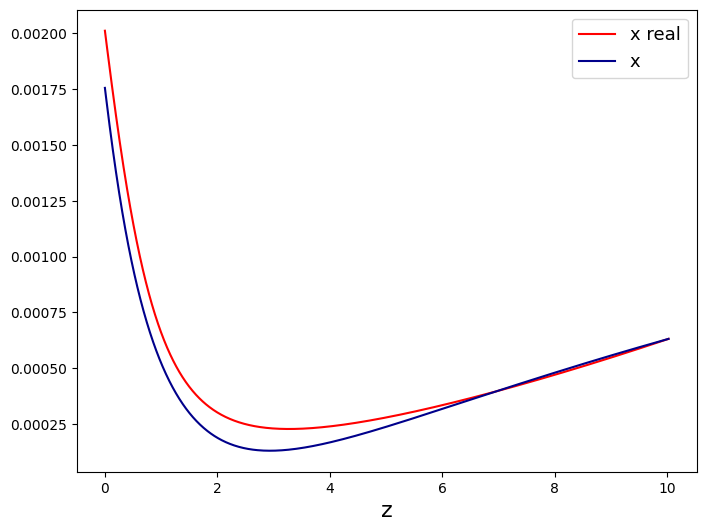

In [9]:
sol_x=ANN(t)[:,0].detach().view(-1,1)
sol_y=ANN(t)[:,1].detach().view(-1,1)
#rhol=ANN(z)[:,2].view(-1,1)
#Hz = 67.0

plt.figure(figsize=(8,6))
#plt.plot(red,sol[:, 0], label='x real', color='red')
plt.plot(red,sol[:, 0], label='x real', color='red')

plt.plot(red, sol_x, color='darkblue', label = 'x' )

#plt.plot(t.detach(),sol_x.detach(), '--',label='x PINN', color='darkred')
# plt.plot(t.detach(),sol_y.detach(), '--', label='y PINN', color='darkblue')
plt.xlabel('z', size=16)
plt.legend(fontsize=13)
#plt.savefig('quint_comparacion.pdf')

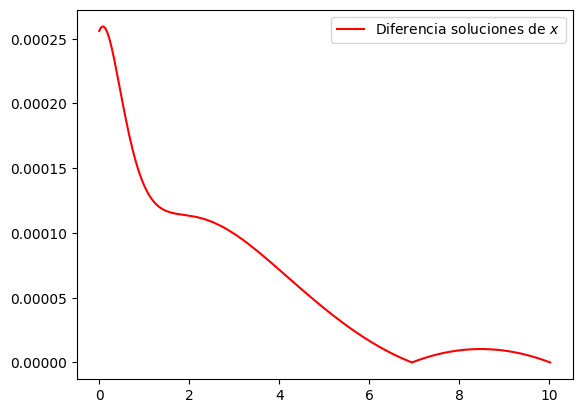

In [10]:
x = sol[:, 0]
y = sol[:, 1]
plt.plot(red,abs(sol_x.reshape(-1)-x), label='Diferencia soluciones de $x$', color='red')
plt.legend()


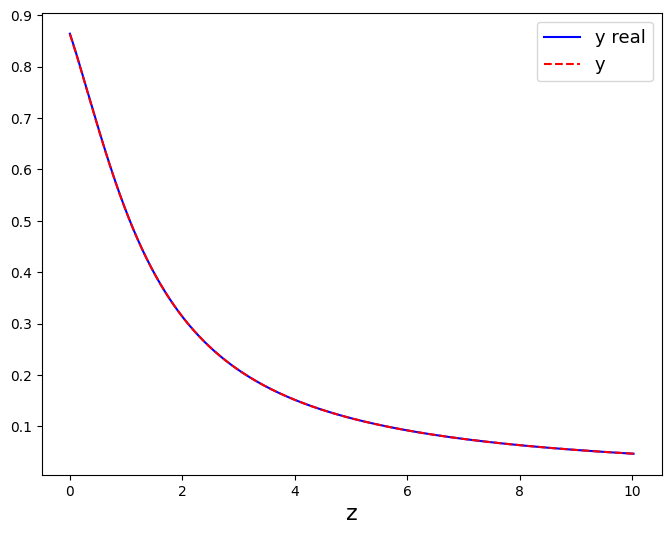

In [11]:
plt.figure(figsize=(8,6))

plt.plot(red, sol[:, 1], label='y real', color='blue')

plt.plot(torch.exp(-t).detach()-1.0, sol_y,'--',
         color='red', label = 'y' )


plt.xlabel('z', size=16)
plt.legend(fontsize=13)
#plt.savefig('quint_comparacion.pdf')

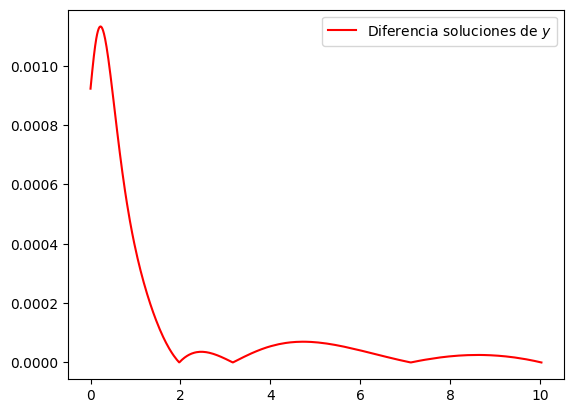

In [194]:
plt.plot(red,abs(sol_y.reshape(-1)-y), label='Diferencia soluciones de $y$', color='red')
plt.legend()

In [12]:
ANN(torch.tensor([N_0]))

tensor([0.0006, 0.0468], grad_fn=<AddBackward0>)

In [13]:
zH=torch.linspace(0.0,3.0,30).view(-1,1)
# sol_x=ANN(-torch.log(zH+1))[:,0].view(-1,1)
# sol_y=ANN(-torch.log(zH+1))[:,1].view(-1,1)
H_quin=67.0*torch.sqrt( Olm0/(1-sol_x**2 - sol_y**2) * torch.exp(-3*t) )

L_data = -torch.log(z+1)
x_data, y_data=ANN(L_data)[:,0].view(-1,1), ANN(L_data)[:,1].view(-1,1)

Text(0.5, 1.0, 'Comportamiento general provisto por la PINN')

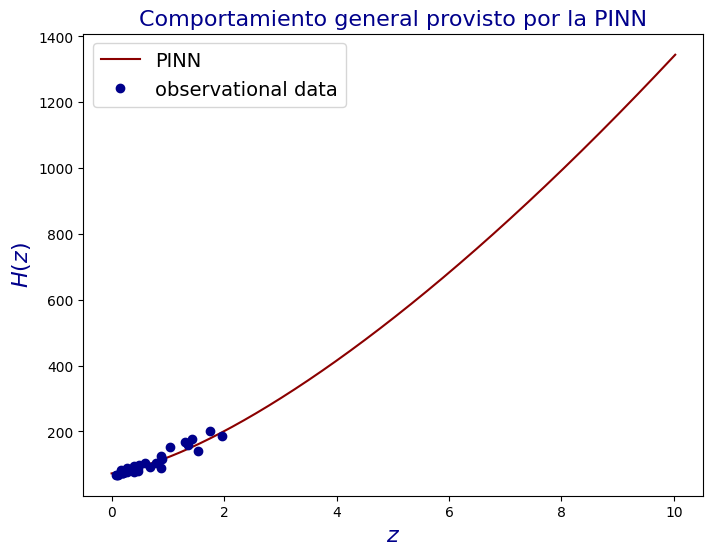

In [14]:

plt.figure(figsize=(8, 6))
plt.plot(torch.exp(-t).detach()-1.0, H_quin.detach(), label='PINN', color='darkred')
plt.plot(z.detach(),H,'o', label='observational data', color='darkblue')
plt.xlabel('$z$', size=16, color='darkblue')
plt.ylabel('$H(z)$', size=16, color='darkblue')
#plt.xlim(0,2.2)
#plt.ylim(50,250)
plt.legend(fontsize=14)
plt.title('Comportamiento general provisto por la PINN', color='darkblue', size=16)
#plt.savefig('quint_H_general.pdf')

Text(0.5, 1.0, 'Reconstrucción hecha con la PINN')

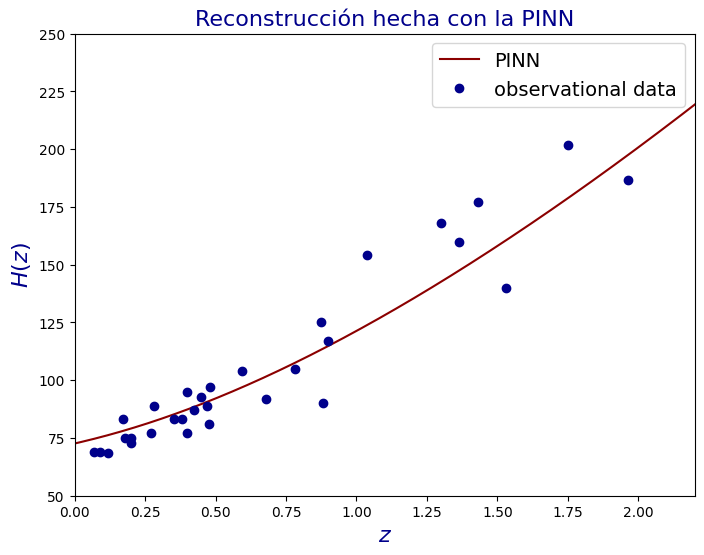

In [15]:

plt.figure(figsize=(8, 6))
plt.plot(torch.exp(-t).detach()-1.0, H_quin.detach(), label='PINN', color='darkred')
plt.plot(z.detach(),H,'o', label='observational data', color='darkblue')
plt.xlabel('$z$', size=16, color='darkblue')
plt.ylabel('$H(z)$', size=16, color='darkblue')
plt.xlim(0,2.2)
plt.ylim(50,250)
plt.legend(fontsize=14)
plt.title('Reconstrucción hecha con la PINN', color='darkblue', size=16)
#plt.savefig('quint_H_datos.pdf')

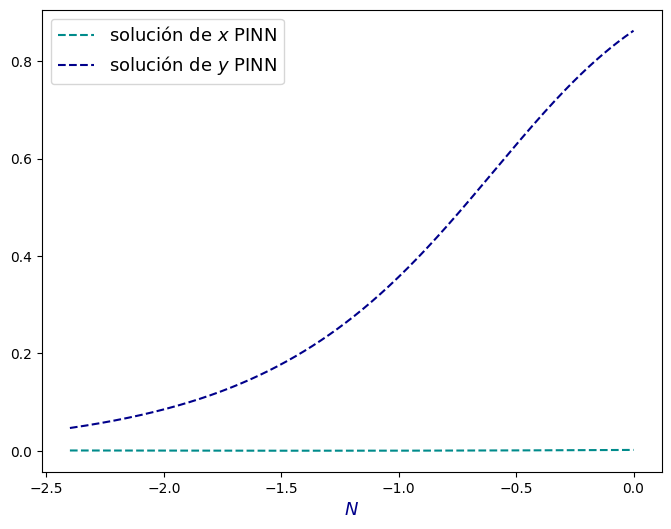

In [16]:
plt.figure(figsize=(8, 6))
sol_x=ANN(t)[:,0].view(-1,1)
sol_y=ANN(t)[:,1].view(-1,1)

#plt.plot(red,sol[:, 0], label='$x$', color='darkred')
#plt.plot(red, sol[:, 1], label='$y$', color='darkorange')
plt.xlabel('$N$', color='darkblue', size=13)
#plt.ylabel('$', color='darkblue', size=13)
plt.plot(t.detach(),sol_x.detach(), '--',label='solución de $x$ PINN', color='darkcyan')
plt.plot(t.detach(),sol_y.detach(), '--', label='solución de $y$ PINN', color='darkblue')
plt.legend(fontsize=13)

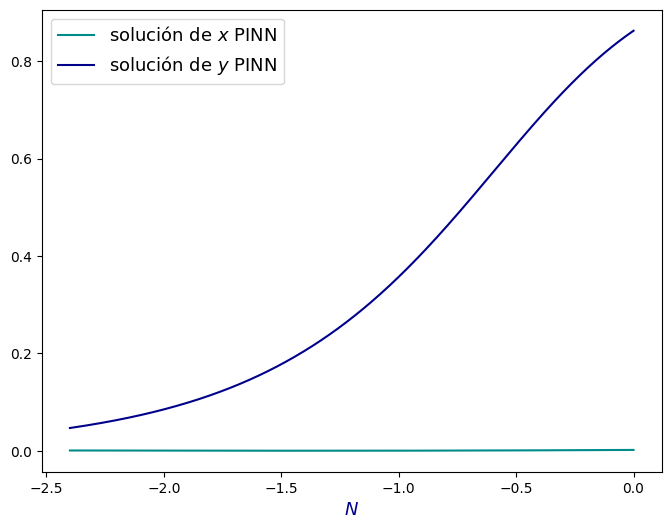

In [17]:
plt.figure(figsize=(8, 6))
sol_x=ANN(t)[:,0].view(-1,1)
sol_y=ANN(t)[:,1].view(-1,1)

# plt.plot(N,sol[:, 0], label='$x$', color='darkred')
# plt.plot(N, sol[:, 1], label='$y$', color='darkorange')
plt.xlabel('$N$', color='darkblue', size=13)
#plt.ylabel('$', color='darkblue', size=13)
plt.plot(t.detach(),sol_x.detach(),label='solución de $x$ PINN', color='darkcyan')
plt.plot(t.detach(),sol_y.detach(), label='solución de $y$ PINN', color='darkblue')
plt.legend(fontsize=13)

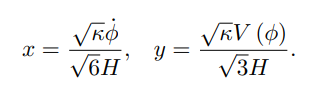

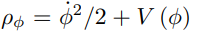



*dadas las soluciones para $x$, $y$ dadas por la red neuronal, vamos a definir el cambio de variable a $\rho$ y $\phi$*

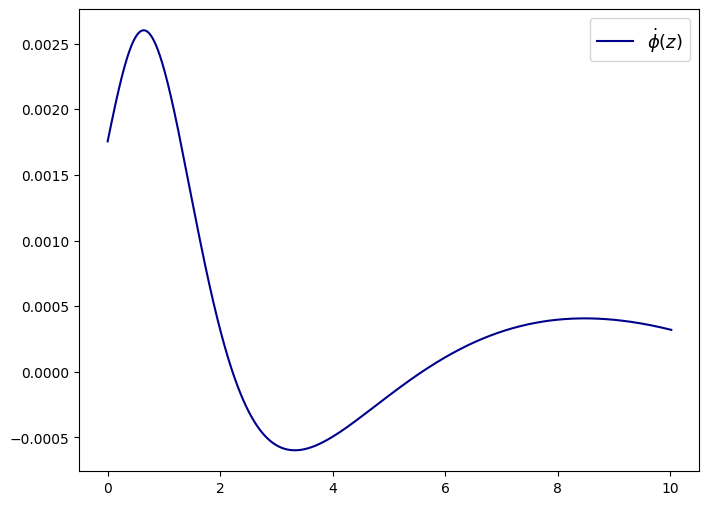

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,0].view(-1,1).detach(),
         color='darkblue', label = '$\dot{\phi}(z)$')

# plt.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,1].view(-1,1).detach(),
#          color='darkblue', label = '$V(z)$')

plt.legend(fontsize=13)

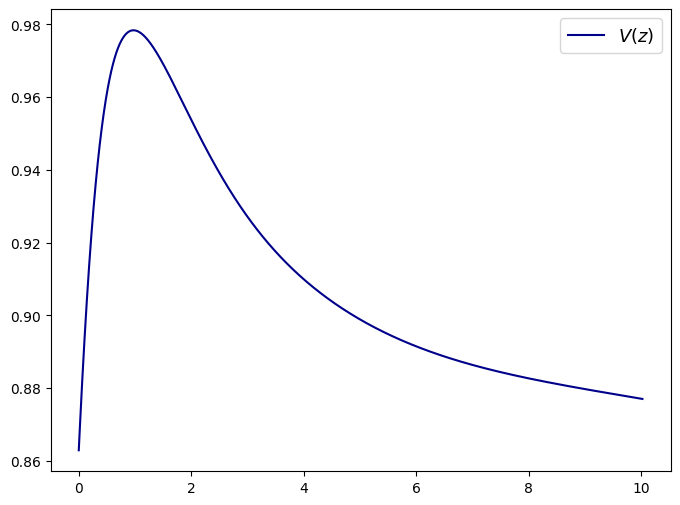

In [19]:
plt.figure(figsize=(8, 6))
# plt.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,0].view(-1,1).detach(),
#          color='darkblue', label = '$\dot{\phi}(z)$')

plt.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,1].view(-1,1).detach(),
         color='darkblue', label = '$V(z)$')

plt.legend(fontsize=13)

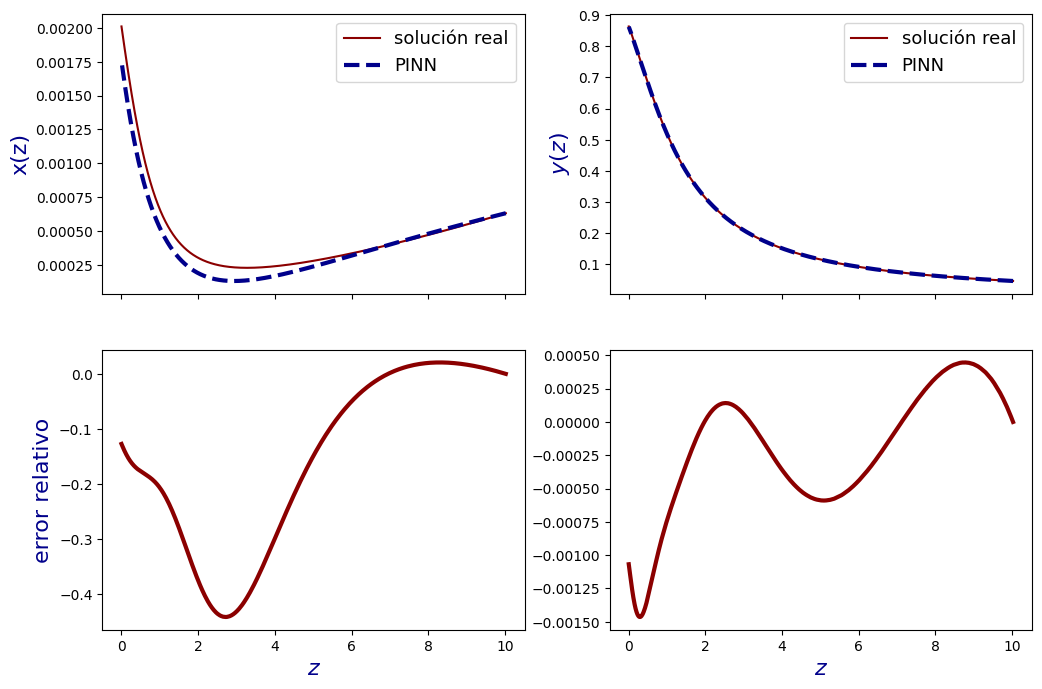

In [32]:
# Definimos el tamaño de la figura
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# Creamos los subplots
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]


# Etiquetamos los ejes
ax1.set_ylabel('x(z)', color='darkblue',fontsize=16)
ax2.set_ylabel('$y(z)$', color='darkblue', fontsize=16)
ax3.set_xlabel('$z$',  color='darkblue',fontsize=16)
ax4.set_xlabel('$z$',  color='darkblue',fontsize=16)
ax3.set_ylabel('error relativo',  color='darkblue',fontsize=16)


# Creamos las líneas
ax1.plot(red,sol[:, 0], label='solución real', color='darkred')
ax1.plot(torch.exp(-t).detach()-1.0, ANN(t)[:,0].view(-1,1).detach(),'--',
         color='darkblue',label='PINN',linewidth=3)
ax1.legend(fontsize=13)

ax2.plot(red,sol[:, 1], color='darkred', label='solución real')
ax2.plot(torch.exp(-t).detach()-1.0, ANN(t)[:,1].view(-1,1).detach(),'--',
         color='darkblue', label = 'PINN',linewidth=3)
ax2.legend(fontsize=13)

ax3.plot(red,(sol_x.detach().reshape(-1)-x)/x, color='darkred', label=('error porcentual $x$'),linewidth=3)
ax4.plot(red,(sol_y.detach().reshape(-1)-y)/y, color='darkred', label=('error porcentual $y$'),linewidth=3)

# ax3.plot(red,np.zeros_like(red),'--')
# ax4.plot(red,np.zeros_like(red),'--')


plt.savefig('x_y_sol.pdf')
plt.savefig('x_y_sol.png')

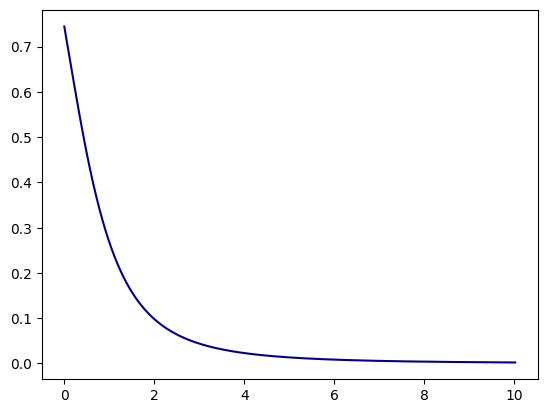

In [217]:
plt.plot(torch.exp(-t).detach()-1.0, sol_x.detach()**2 + sol_y.detach()**2,color='darkblue')

# Estableciendo la constante gravitacional de Einstein $\kappa = 1$

In [204]:
#plt.plot(t, sol_x)
#plt.plot(, x)

In [205]:
#dom.shape

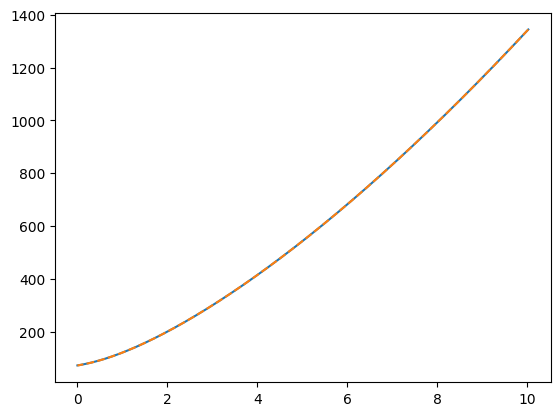

In [259]:
# dom = torch.exp(-t).detach()-1.0
# x= sol[:, 0]
# y= sol[:, 1]
# x=x.reshape(-1,1)
# y=y.reshape(-1,1)
#red=red.reshape(-1,1)
#dom=dom.reshape(-1,1)

H_quin = 67.0*torch.sqrt( Olm0/(1-sol_x.reshape(-1)**2 - sol_y.reshape(-1)**2) * torch.exp(-3*t.reshape(-1)))
H_real = 67.0*np.sqrt( Olm0/(1-x.reshape(-1)**2 - y.reshape(-1)**2) * np.exp(-3*N.reshape(-1)))
plt.plot(red.reshape(-1), H_real, label='Friedmann equation real solution')
plt.plot(red.reshape(-1), H_quin.detach(), '--', label='Friedmann equation, ANN solution')
# plt.xlabel('z')
# plt.ylabel('H(z)')
# plt.legend()

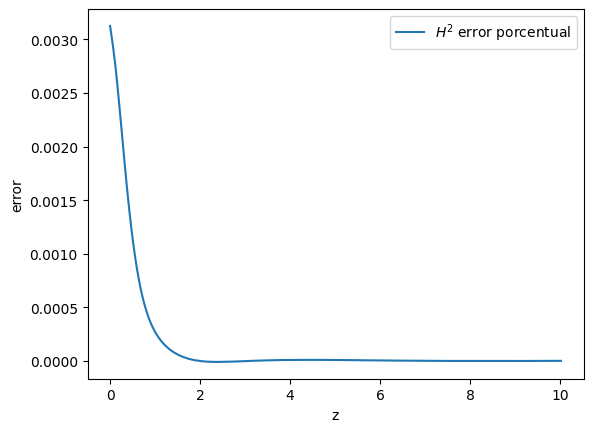

In [260]:
plt.plot(red.reshape(-1), (H_real-H_quin.detach().numpy())/H_real, label='$H^2$ error porcentual')
plt.xlabel('z')
plt.ylabel('error')
plt.legend()

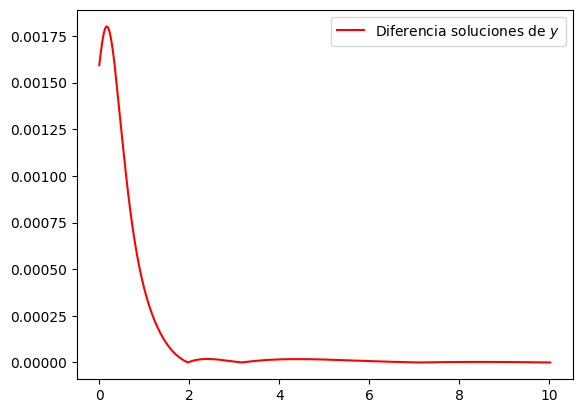

In [208]:
plt.plot(red,abs(sol_y.detach().reshape(-1)**2-y**2), label='Diferencia soluciones de $y$', color='red')
plt.legend()

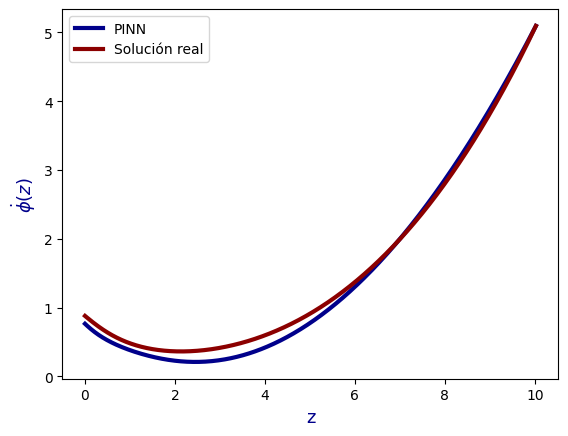

In [306]:
kappa0 = 1
phi_dot = 6*H_quin*sol_x.reshape(-1)/kappa0**0.5
phi_real = 6*H_real.reshape(-1)*x/kappa0**0.5

plt.plot(red, phi_dot.detach(), label='PINN', color = 'darkblue',linewidth=3)
plt.plot(red, phi_real, label='Solución real', color='darkred',linewidth=3)

plt.xlabel('z', color='darkblue', size=13)
plt.ylabel('$\dot{\phi}(z)$', color='darkblue', size=13)
plt.legend()


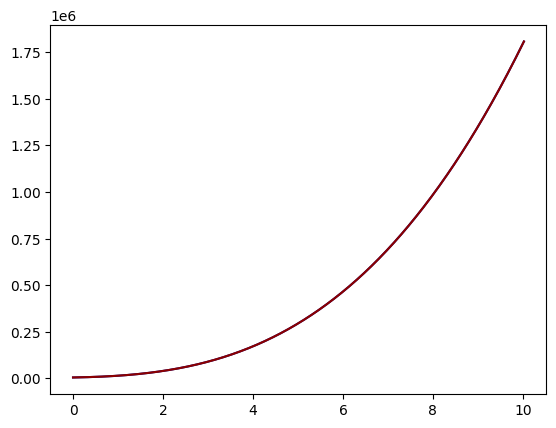

In [165]:
plt.plot(red, H_quin.detach()**2, label='V red', color = 'darkblue')
plt.plot(red, H_real**2, label='V real', color='darkred')


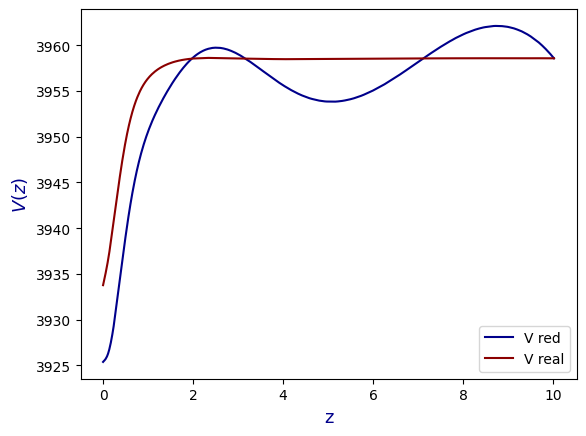

In [285]:
# V_red = 3.0*H_quin**2*sol_y**2/kappa0
# V = 3.0*H_real**2*sol[:, 1]**2/kappa0
# H_quin=H_quin.detach().numpy()
# H_real=H_real.reshape(-1,1)
# y = y.reshape(-1,1)

V_red = H_quin**2 * sol_y.view(-1)**2
V = H_quin.detach()**2 * y**2

plt.plot(red, V_red.detach(), label='V red', color = 'darkblue')
plt.plot(red, V, label='V real', color='darkred')

plt.xlabel('z',color='darkblue', size=13)
plt.ylabel('$V(z)$', color='darkblue', size=13)
plt.legend()
#plt.yscale('log')
# # V = 3*H_quin**2 * sol_y**2/kappa0
# # plt.plot(dom, V.detach(), label='Friedmann equation')
# plt.xlabel('z')
# plt.ylabel('$V(z)$')

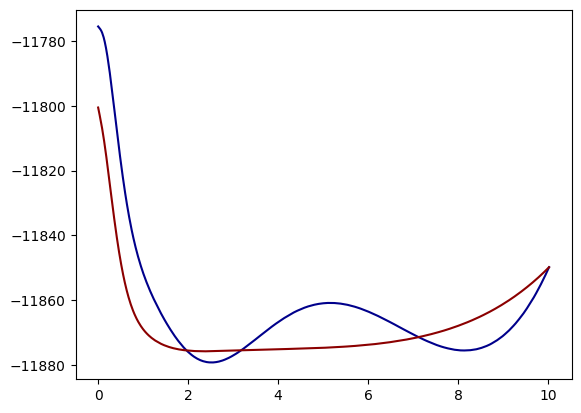

In [290]:
rho_net = 3*H_quin.view(-1)**2 * (12.0 * sol_x.view(-1)**2 - sol_y.view(-1)**2)
rho = 3*H_quin.view(-1).detach().numpy()**2 * (12*x**2 - y**2)

plt.plot(red, rho_net.detach(), label='V red', color = 'darkblue')
plt.plot(red, rho, label='V real', color='darkred')

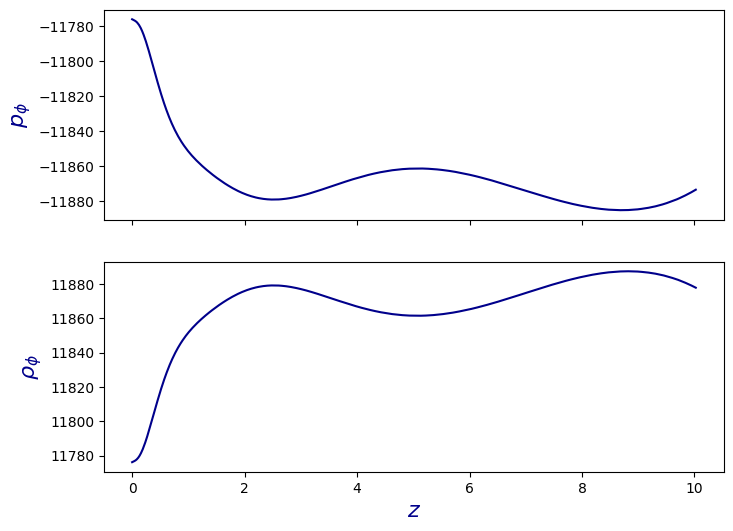

In [277]:
P_phi = 0.5*(6*H_quin.view(-1)**2 * sol_x.view(-1)**2) - 3.0*H_quin.view(-1)**2 * sol_y.view(-1)**2
rho_phi = 0.5*(6*H_quin.view(-1)**2 * sol_x.view(-1)**2) + 3.0*H_quin.view(-1)**2 * sol_y.view(-1)**2
# grafica para phi y V
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Creamos los subplots
ax1 = axs[0]
ax2 = axs[1]

# Etiquetamos los ejes
ax1.set_ylabel('$p_\phi$',  color='darkblue',fontsize=16)
ax2.set_ylabel('$\\rho_\phi$',  color='darkblue',fontsize=16)
ax2.set_xlabel('$z$',  color='darkblue',fontsize=16)

# Creamos las líneas
# ax1.plot(torch.exp(-t).detach()-1.0, ANN(torch.exp(-t).detach()-1.0)[:,0].view(-1,1).detach(),
#          color='darkblue')

ax1.plot(torch.exp(-t).detach()-1.0, P_phi.detach(),
          color='darkblue')
ax2.plot(torch.exp(-t).detach()-1.0, rho_phi.detach(),
          color='darkblue', label = '$V(z)$')

# Añadimos la leyenda
#ax1.legend(fontsize=13)
#plt.savefig('p_rho.pdf')

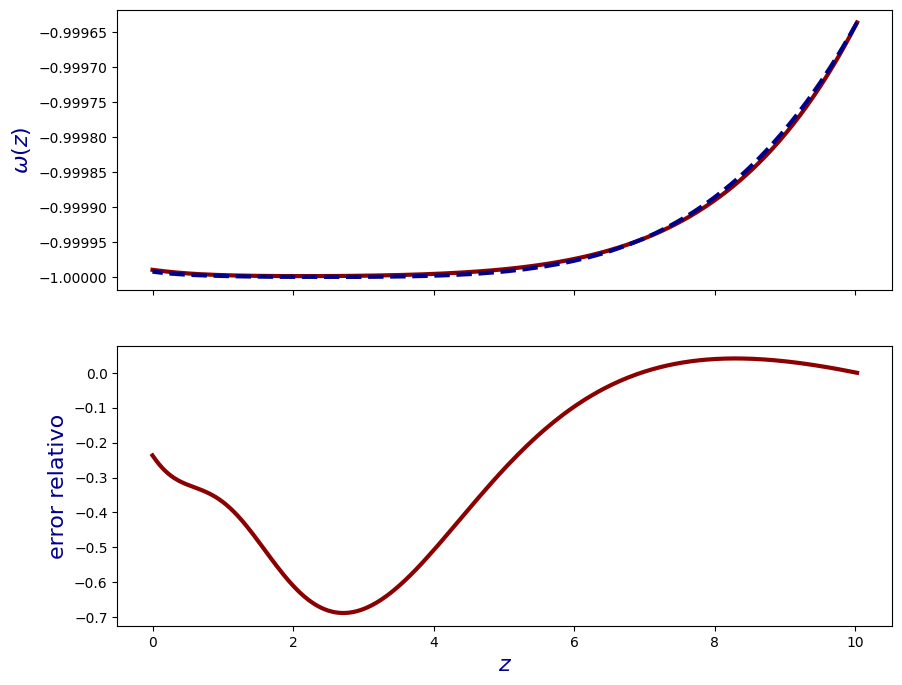

In [33]:
gamma=2.0*sol_x**2/(sol_x**2 + sol_y**2)
gamma_real = 2.0*x**2/(x**2 + y**2)
error = (gamma.reshape(-1).detach()-gamma_real.reshape(-1))/gamma_real.reshape(-1)

# Definimos el tamaño de la figura
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Creamos los subplots
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(torch.exp(-t).detach()-1.0,gamma_real-1, color='darkred',linewidth=3)
ax1.plot(torch.exp(-t).detach()-1.0,gamma.detach()-1, '--',color='darkblue',linewidth=3)

ax2.plot(torch.exp(-t).detach()-1.0,error,
         color='darkred',linewidth=3)

#plt.plot(torch.exp(-t).detach()-1.0,P_phi.detach()/rho_phi.detach(), '--r')

ax2.set_xlabel('$z$',color='darkblue',size=16)
ax1.set_ylabel('$\omega(z)$',color='darkblue',size=16);
ax2.set_ylabel('error relativo',color='darkblue',size=16);
plt.savefig('eq_edo.pdf')
plt.savefig('eq_edo.png')